In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [5]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1) 

In [6]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [8]:
X_train.shape, X_test.shape, y_train.shape

((182, 11), (61, 11), (182,))

In [9]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.679075,-0.390305,-0.314034,0.680863,0.473480,0.352828,0.612571,0.444060,0.509785,0.319167
RH,-0.679075,1.000000,0.298149,0.235968,-0.637944,-0.384189,-0.185380,-0.663150,-0.322272,-0.421015,-0.416074
Ws,-0.390305,0.298149,1.000000,0.219014,-0.269477,-0.073448,0.007526,-0.043368,-0.043533,-0.146038,-0.204210
Rain,-0.314034,0.235968,0.219014,1.000000,-0.528773,-0.284261,-0.286047,-0.340628,-0.294556,-0.384665,-0.031671
FFMC,0.680863,-0.637944,-0.269477,-0.528773,1.000000,0.608669,0.485302,0.739012,0.591803,0.766842,0.220484
DMC,0.473480,-0.384189,-0.073448,-0.284261,0.608669,1.000000,0.859809,0.656075,0.979153,0.570214,0.224193
DC,0.352828,-0.185380,0.007526,-0.286047,0.485302,0.859809,1.000000,0.450276,0.932696,0.453344,-0.065357
ISI,0.612571,-0.663150,-0.043368,-0.340628,0.739012,0.656075,0.450276,1.000000,0.611016,0.736461,0.301981
BUI,0.444060,-0.322272,-0.043533,-0.294556,0.591803,0.979153,0.932696,0.611016,1.000000,0.562295,0.113420
Classes,0.509785,-0.421015,-0.146038,-0.384665,0.766842,0.570214,0.453344,0.736461,0.562295,1.000000,0.232802


<Axes: >

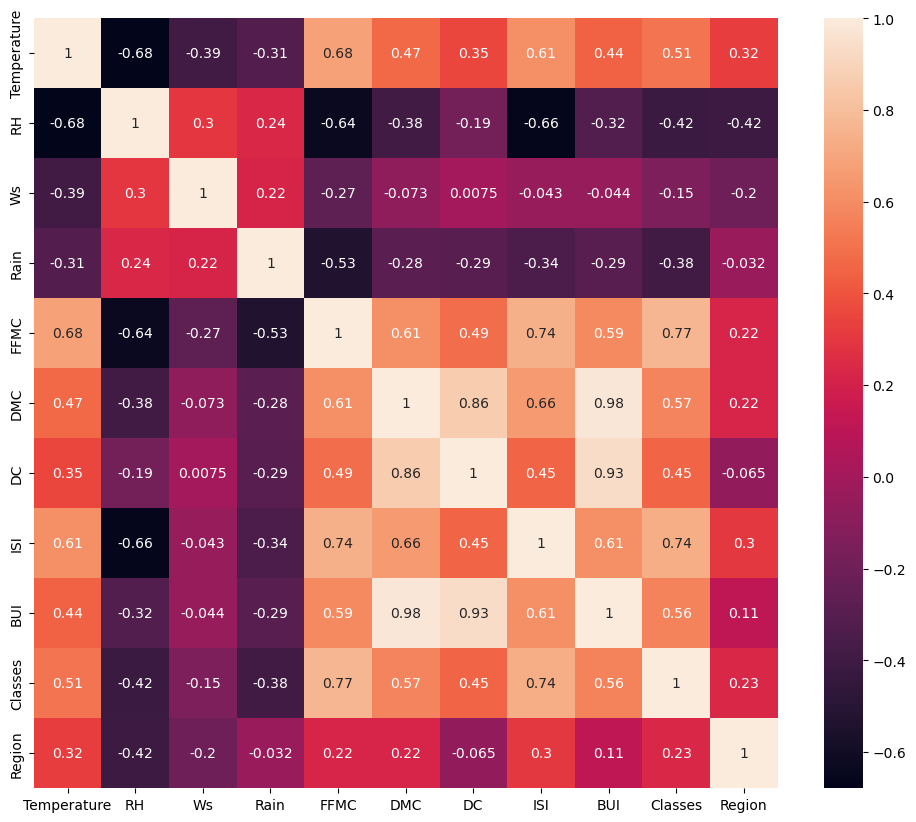

In [10]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train, 0.85)

In [13]:
corr_features

{'BUI', 'DC'}

In [14]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Standardization 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled

array([[ 0.18960398,  0.76067024, -1.21040809,  0.51157163, -1.31227059,
        -1.06203681, -0.99765885, -1.14183951, -1.        ],
       [-0.96066018, -0.33481529, -0.53465879, -0.36770888,  0.80238005,
        -0.15510614,  0.77124176,  0.87577982, -1.        ],
       [-2.39849039, -0.54021882,  0.81683982, -0.31885996,  0.11188189,
        -0.87712862, -0.74851792, -1.14183951,  1.        ],
       [ 1.33986815, -0.60868667, -0.53465879, -0.36770888,  0.81676543,
         2.36316737,  0.82106995,  0.87577982,  1.        ],
       [ 0.76473607, -0.1978796 ,  0.47896516, -0.36770888,  0.66571896,
         0.04741236,  0.54701492,  0.87577982, -1.        ],
       [ 0.18960398, -2.45731849, -0.87253344, -0.36770888,  1.13324376,
         0.61094209,  2.36574373,  0.87577982,  1.        ],
       [-0.96066018,  1.71922007, -0.19678414, -0.17231321, -2.21135674,
        -0.88593377, -1.12222932, -1.14183951,  1.        ],
       [-0.09796206, -0.47175098, -0.53465879, -0.36770888,  0

C:\Users\hnikolov\AppData\Local\Temp\ipykernel_13664\2297437911.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train after scaling')

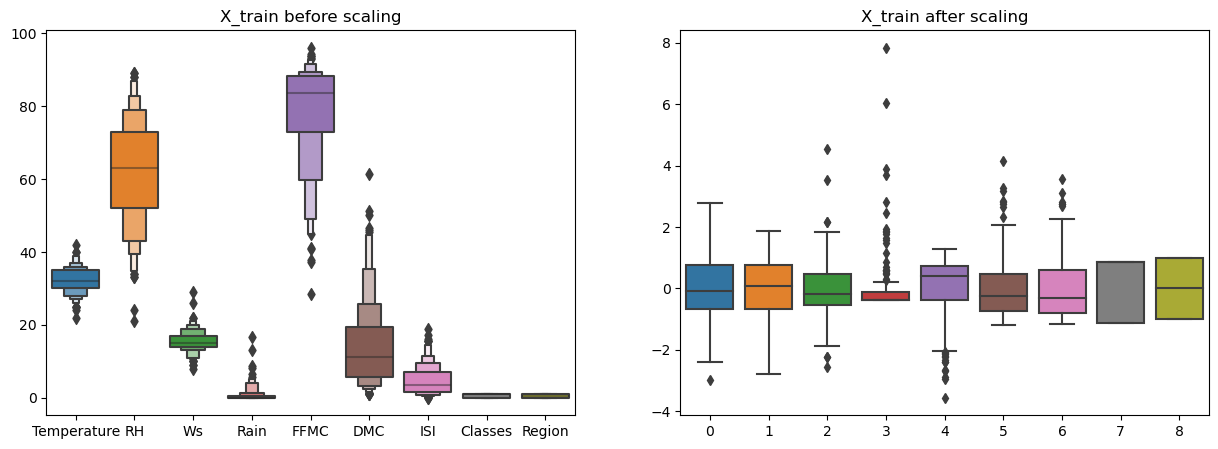

In [17]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxenplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

# Linear Regression Model

Mean absolute error is 0.7954779534689081
R2 score is 0.9829598208563046


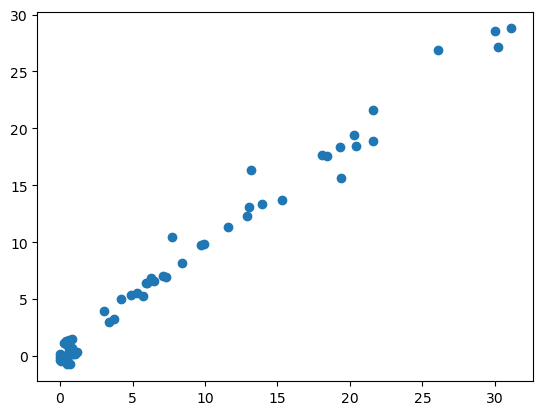

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

Mean absolute error is 1.5785178308487475
R2 score is 0.9374553946690878


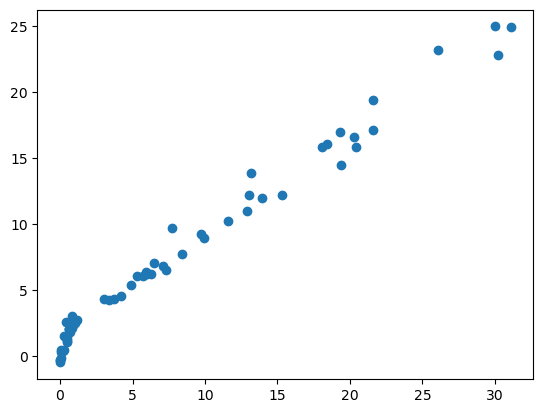

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

# Cross Validation

In [25]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [26]:
lassocv.alpha_

0.03135393028364185

In [27]:
lassocv.alphas_

array([6.29973515, 5.87515408, 5.47918836, 5.1099094 , 4.76551861,
       4.44433861, 4.14480506, 3.86545907, 3.60494007, 3.36197917,
       3.13539303, 2.92407803, 2.72700496, 2.54321395, 2.37180984,
       2.2119578 , 2.06287925, 1.92384809, 1.79418717, 1.67326496,
       1.5604925 , 1.45532053, 1.35723679, 1.26576358, 1.18045535,
       1.10089661, 1.02669986, 0.95750373, 0.89297118, 0.83278791,
       0.77666079, 0.72431646, 0.67549995, 0.62997351, 0.58751541,
       0.54791884, 0.51099094, 0.47655186, 0.44443386, 0.41448051,
       0.38654591, 0.36049401, 0.33619792, 0.3135393 , 0.2924078 ,
       0.2727005 , 0.2543214 , 0.23718098, 0.22119578, 0.20628792,
       0.19238481, 0.17941872, 0.1673265 , 0.15604925, 0.14553205,
       0.13572368, 0.12657636, 0.11804553, 0.11008966, 0.10266999,
       0.09575037, 0.08929712, 0.08327879, 0.07766608, 0.07243165,
       0.06755   , 0.06299735, 0.05875154, 0.05479188, 0.05109909,
       0.04765519, 0.04444339, 0.04144805, 0.03865459, 0.03604

Mean absolute error is 0.7759541811118117
R2 score is 0.9828822054297418


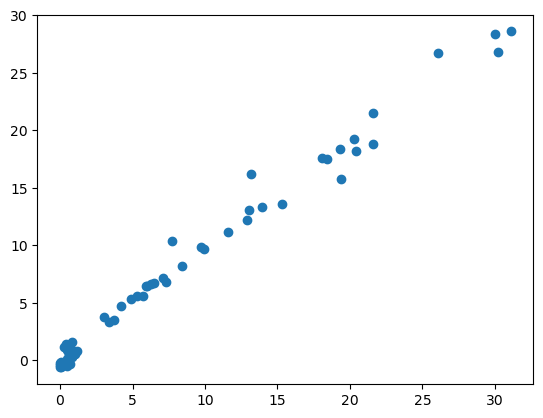

In [28]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

Mean absolute error is 0.8109931218063556
R2 score is 0.9822532699642177


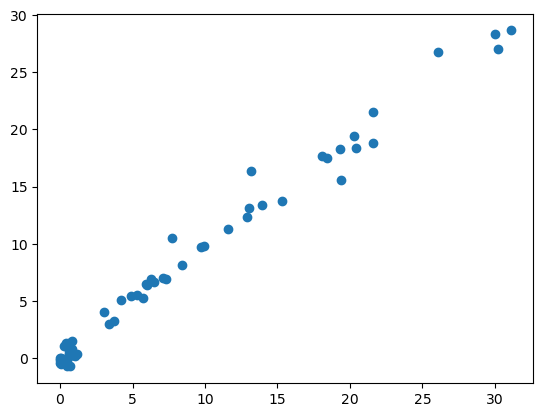

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

Mean absolute error is 0.8109931218063556
R2 score is 0.9822532699642177


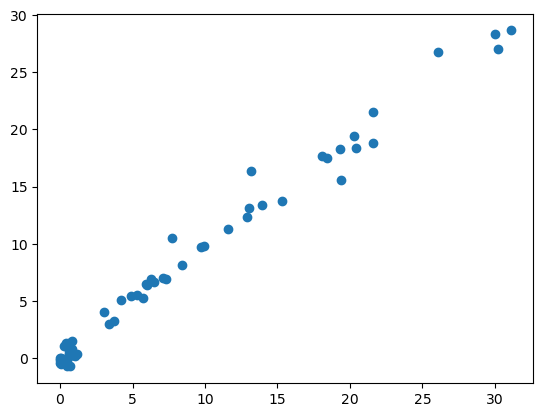

In [29]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

In [31]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

Mean absolute error is 2.255550351421716
R2 score is 0.8647114151295822


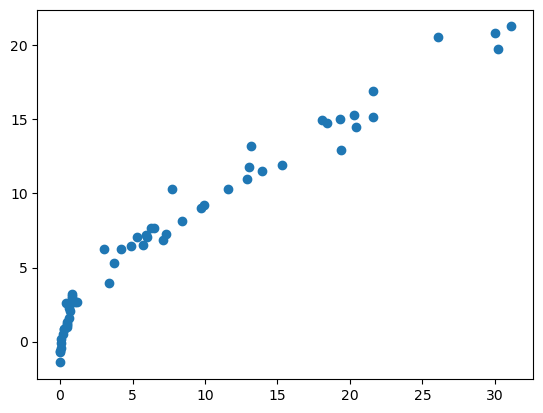

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

Mean absolute error is 0.8589803984759046
R2 score is 0.9796855472278512


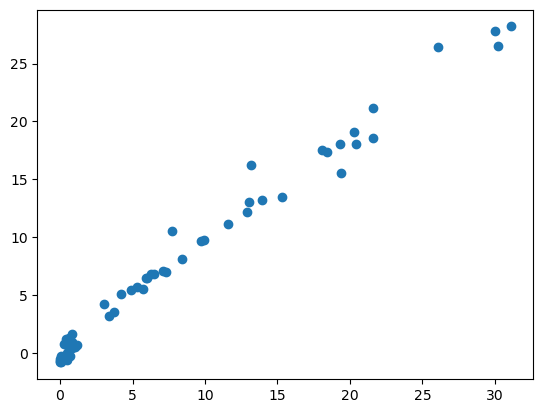

In [33]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean absolute error is {mae}')
print(f'R2 score is {score}')
plt.scatter(y_test, y_pred)

# Pickle the models

In [34]:
scaler

StandardScaler()

In [35]:
ridge

Ridge()

In [36]:
import pickle

In [38]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('model_ridge.pkl', 'wb'))